In [3]:
import pynbody
import pynbody.plot.sph as sph
import pynbody.plot as pp
from pynbody.analysis import angmom
import matplotlib.pylab as plt
import numpy as np

In [4]:
s = pynbody.load('/home/michele/sim/analysis/snapshot_0065')
s.physical_units()
sk = pynbody.load('/home/michele/sim/analysis/snapshot_0065.kicked')
sk.physical_units()

In [5]:
# pynbody.analysis.angmom.sideon(s)

In [6]:
pynbody.config

{'centering-scheme': 'ssc',
 'default-cosmology': {'a': 1.0,
  'h': 0.6777,
  'ns': 0.96,
  'omegaB0': 0.0482,
  'omegaL0': 0.691,
  'omegaM0': 0.309,
  'running': 0.0,
  'sigma8': 0.8288},
 'disk-fit-function': 'expsech',
 'gravity_calculation_mode': 'direct_omp',
 'halo-class-priority': [pynbody.halo.GrpCatalogue,
  pynbody.halo.AmigaGrpCatalogue,
  pynbody.halo.RockstarIntermediateCatalogue,
  pynbody.halo.RockstarCatalogue,
  pynbody.halo.AHFCatalogue,
  pynbody.halo.SubfindCatalogue],
 'number_of_threads': 8,
 'snap-class-priority': [pynbody.snapshot.ramses.RamsesSnap,
  pynbody.snapshot.grafic.GrafICSnap,
  pynbody.snapshot.nchilada.NchiladaSnap,
  pynbody.snapshot.gadget.GadgetSnap,
  pynbody.snapshot.gadgethdf.GadgetHDFSnap,
  pynbody.snapshot.gadgethdf.SubFindHDFSnap,
  pynbody.snapshot.tipsy.TipsySnap,
  pynbody.snapshot.ascii.AsciiSnap],
 'sph': {'smooth-particles': 32, 'tree-leafsize': 16},
 'threading': 'True',
 'verbose': False}

In [7]:
s.properties

{'a': 0.6552559150121577,
 'boxsize': Unit("1.11e+01 kpc"),
 'h': 0.7,
 'omegaL0': 0.72,
 'omegaM0': 1.0,
 'time': Unit("8.33e+00 kpc s km**-1")}

Try to explore cell n. 4

In [38]:
mass=s['mass']
pos=s['pos']


In [8]:
s.properties['time']

Unit("8.33e+00 kpc s km**-1")

In [5]:
dm_array = s.d['iord']

In [6]:
# To get the numpy array from a SimArray use view(type=np.ndarray)
dm_array=s.d['iord'].view(type=np.ndarray)
# np.where(s.d['iord']==4, s.)

In [20]:
v = s['vel']

In [21]:
v

SimArray([[-332.82037354, -381.28024292,  -46.24300766],
          [-167.11138916, -446.81335449, -100.39344025],
          [-113.73114777, -457.40158081,  -69.64994812],
          ..., 
          [   6.44213343,  -24.25647736,   -1.13038325],
          [   6.72775459,  -71.16104889,   18.95964622],
          [  55.82160568,  -36.37310791,    4.00564814]], dtype=float32, 'km s**-1')

In [22]:
v.size

1239102

In [23]:
sk.d['vel']

SimArray([[-357.84228516,  366.46292114,  -13.79944706],
          [-352.07485962,  365.11547852,  -11.76179314],
          [-352.28573608,  371.97714233,  -17.34726524],
          ..., 
          [-345.00912476,  371.80169678,   26.90209198],
          [-348.91119385,  370.52923584,   22.00664139],
          [-357.91485596,  371.8460083 ,   21.47101212]], dtype=float32, 'km s**-1')

Plot stars

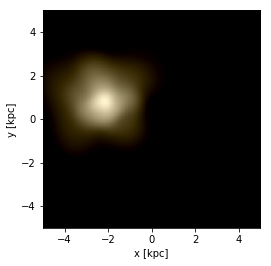

In [30]:
pynbody.plot.stars.render(s, width=10)
plt.show()

In [17]:
simname='plots/t'

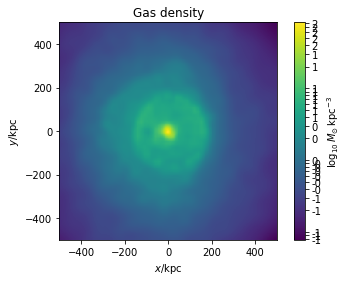

In [31]:
pp.sph.image(s.gas, filename=simname+'.facegas.png', width=1000, title="Gas density")
plt.show()

In [25]:
pp.sph.image(s.star, filename=simname+'.facestar.png', width=100, title="Star particles")

SimArray([[ 0.00043989,  0.00043488,  0.00042987, ...,  0.01509718,
            0.01476877,  0.01444036],
          [ 0.00046353,  0.00045791,  0.0004523 , ...,  0.01536556,
            0.01502456,  0.01468357],
          [ 0.00048716,  0.00048094,  0.00047472, ...,  0.01563395,
            0.01528036,  0.01492677],
          ..., 
          [ 0.00534293,  0.00538038,  0.00541783, ...,  0.00341213,
            0.00336604,  0.00331995],
          [ 0.00509167,  0.00512458,  0.00515748, ...,  0.00330154,
            0.00325664,  0.00321174],
          [ 0.00484041,  0.00486877,  0.00489713, ...,  0.00319094,
            0.00314723,  0.00310353]], dtype=float32, 'Msol kpc**-3')

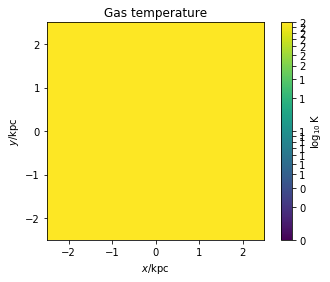

In [29]:
pp.sph.image(s.gas, qty='temp', #filename=simname+'.tempgasdiskface.png',
             width=5, vmin=1, vmax=100, title='Gas temperature')
plt.show()

In [44]:
time = s.properties['time']
time.in_units("Gyr")

8.149660006021044

In [58]:
from pynbody.analysis import pkdgrav_cosmo as cosmo
c = cosmo.Cosmology(sim=s)

In [64]:
c.a

0.008996599353849888
4.353330135345459


/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.972695e-08
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.037007e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.825575e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.776510e-09
  AccuracyWarning)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadrature.py:709: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.048614e-08
  AccuracyWarning)


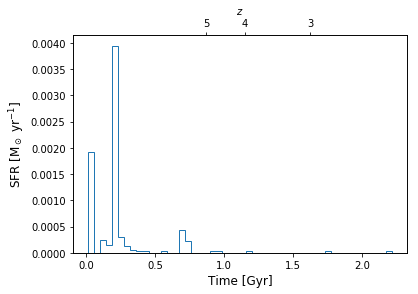

In [57]:
pp.sfh(s,filename=simname + '.sfh.png', massform=False, nbins=50)
print(s.stars['tform'].in_units("Gyr").min())
print(s.stars['tform'].in_units("Gyr").max())

plt.show()

In [ ]:
s.gas['hiden'] = s.gas['rho']*s.gas['HI']
s.gas['hiden'].units = s.gas['rho'].units

pynbody.plot.image(s.gas, qty='hiden', units='m_p cm^-2', width=1000,
                   center=False,filename=simname+'.hi500kpc.png', vmin=14,vmax=22)
pynbody.plot.image(s.gas, qty='hiden', units='m_p cm^-2', width=500,
                   center=False, filename=simname+'.hi250kpc.png', vmin=14,vmax=22)

In [ ]:
oviif = pynbody.analysis.ionfrac.calculate(s.gas)
s.gas['oviden'] = s.gas['rho']*s.gas['OxMassFrac']*oviif
s.gas['oviden'].units = s.gas['rho'].units
soviim = pynbody.plot.image(s.gas[notdiskf], qty='oviden',
                            units='16 m_p cm^-2', width=1000,
                            filename=simname+'.ovi500kpc.png',
                            vmin=12,vmax=17)
s.gas['oxden'] = s.gas['rho']*s.gas['OxMassFrac']
s.gas['oxden'].units = s.gas['rho'].units
pynbody.plot.image(s.gas,qty='oxden',units='16 m_p cm^-2',
                   width=500,center=False,
                   filename=simname+'.ox500kpc.png',vmin=12,vmax=18)
pynbody.analysis.angmom.sideon(h[i])

In [ ]:
pp.sph.image(s.gas,qty='temp', filename=simname+'.tempgasside.png',
             width=3, vmin=3, vmax=7)
pp.sph.image(s.gas,qty='temp', filename=simname+'.tempgasdiskside.png',
             width=30, vmin=3, vmax=7)
pynbody.plot.image(s.gas,qty='temp',width=500,
                   filename=simname+'.temp500kpc.png',vmin=3,vmax=7)

In [ ]:
simlist = [s, sk]

In [ ]:
#you can also make a stream visualization instead of a quiver plot
#pynbody.analysis.angmom.faceon(h[1])
sph.velocity_image(s.g, width='100 Mpc', cmap = "Greys_r", mode='stream', units='Msol kpc^-2',
                   density=3.0, vector_resolution=100, vmin=1e-3,
                   show_cbar=False, vector_color='black')
plt.show()

In [ ]:
s.g['temp']

In [ ]:
# sph.velocity_image(s.g, vector_color="cyan", qty="temp", cmap="YlOrRd",
#                    denoise=True, approximate_fast=False, show_cbar = False)

In [ ]:
#create a simple slice showing the gas temperature, with velocity vectors overlaid

# f, axs = plt.subplots(1,2,figsize=(14,6))

# simlist = [s, sk]
# for i, s in enumerate(simlist):
#     print('Printing ', s.filename)
#     sph.velocity_image(s.g, vector_color="cyan", qty="temp", cmap="YlOrRd",
#                        denoise=True,approximate_fast=False, show_cbar = False, subplot=axs[i])
# plt.show()

# Working plots

In [ ]:
s.s.loadable_keys()

In [ ]:
pp.sfh(s,filename="f"+'.sfh.png',nbins=500);

## Rotation curve

In [ ]:
pp.rotation_curve(s, filename=simname+'.rc.png', quick=True,
                  max='40 kpc', center=False);

## Rotation curve with parts

In [ ]:
pp.rotation_curve(s, filename=simname+'.rcparts.png', quick=True,
                  parts=True, legend=True, max='40 Mpc', center=False);

## Density temperature

In [ ]:
pp.rho_T(s,filename=simname+'.phase.png');

## Star density and dark matter density profiles

In [ ]:
# create a profile object for the stars (by default this is a 2D profile)
p = pynbody.analysis.profile.Profile(s.s, min=.01, max=50)

# make the figure and sub plots
f, axs = plt.subplots(1, 2, figsize=(14,6))

# make the plot
axs[0].plot(p['rbins'], p['density'], 'k')
axs[0].semilogy()
axs[0].set_xlabel('R [kpc]')
axs[0].set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]')

# make a 3D density plot of the dark matter (note ndim=3 in the constructor below)
p = pynbody.analysis.profile.Profile(s.d, min=.01, max=50, ndim=3)

axs[1].plot(p['rbins'], p['density'], 'k')
axs[1].semilogy()
axs[1].set_xlabel('R [kpc]')
axs[1].set_ylabel(r'$\rho_{DM}$ [M$_{\odot}$ kpc$^{-3}$]')
plt.savefig(filename=simname+'.density_profiles.png')

## Surface brightness profile in V band 

In [ ]:
pp.sbprofile(s, filename=simname+'.sbprof.png', 
             center=False, rmax='100 Mpc', diskheight='400 Mpc')  # Surface brightness profile

## Dark matter density profile
To plot the y value in terms of rho_{cr} (only if in_units parameter is None) it is using the h value sim.properties['h]
It is plotting the error bar dividing the value of the density for the number of particle in the bin

In [ ]:
pp.density_profile(s.dark, filename=simname+'.dmprof.png', center=False)

# Not working plots

In [ ]:
pp.guo(s, baryfrac=True, filename=simname+'.guo.png')

In [ ]:
pp.ofefeh(s.stars, filename=simname+'.ofefeh.png',
          weights=s.stars['mass'].in_units('Msol'), scalemin=1e3,
          scalemax=1e6, x_range=[-3,0.3],y_range=[-0.5,1.0])

In [ ]:
# Trying to center the rotation curve
t = angmom.faceon(s, cen_size='400 Mpc')
pp.rotation_curve(t, filename=simname+'.rcparts.png', quick=True,
                  parts=True, legend=True, min='0 Mpc', max='40 Mpc', center=False)

In [ ]:
# import pynbody.plot as pp
# simname = 'ppp'
# ### Make plots
# # try:

# pp.ofefeh(h[i].stars, filename=simname+'.ofefeh.png',
#               weights=h[i].stars['mass'].in_units('Msol'), scalemin=1e3,
#               scalemax=1e6, x_range=[-3,0.3],y_range=[-0.5,1.0])
# pp.mdf(h[i].stars,filename=simname+'.mdf.png', range=[-4,0.5])
# pp.guo(h,baryfrac=True,filename=simname+'.guo.png')
# pp.schmidtlaw(h[i],filename=simname+'.schmidt.png',center=False)
# pp.satlf(h[i],filename=simname+'.satlf.png')
# # except:
# #     pass

In [ ]:
t = angmom.faceon(s, cen_size='1 Mpc')
pp.rotation_curve(t, filename=simname+'.rcparts.png', quick=True,
                  parts=True, legend=True, min='0 Mpc', max='40 Mpc', center=False)